# **Project 2**, APS1070 Fall 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: OCT 27, 11 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Jingjing Liu
*   Student Number: 1006103823

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset, consisting of transactions made by credit cards in September 2013 by European cardholders. The dataset contains only numerical input variables (`V1`, `V2`, … `V28`) which are the principal components obtained with PCA transformation (PCA will the introduced later in this course), due to confidentiality issues. The only features which have not been transformed with PCA are `Time` (seconds elapsed between each transaction and the first transaction in the dataset) and `Amount` (transaction Amount).\
This dataset contains 30 key features, which are not
directly interpretable but contain meaningful information about the dataset.
Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]**
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?_____ **[0.2]**


1) there are 284807 rows

2) the column "Class" contains the targets

3) Class = 0 means the target value is valid, Class = 1 means the target value is fraud





In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

'creditcard (1).csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
### YOUR CODE HERE ###
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
num_of_rows = df.shape[0]
print('there are',num_of_rows,'rows')
print('the column "Class" contains the targets')
print('Class = 0 means the target value is valid, Class = 1 means the target value is fraud')

there are 284807 rows
the column "Class" contains the targets
Class = 0 means the target value is valid, Class = 1 means the target value is fraud


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**

  the percentage for class 0 is  0.9982725143693799 %

  the percentage for class 1 is  0.001727485630620034 %

* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**

  This data is considered unbalanced, because there is the big difference between the percentage of class 0 and the percentage of class 1. The number of class 0 is much more than the number of class 1.
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**

  The balance/imbalance is important, because it can affect the performance of a classifier. In an imbalanced dataset, a classifier may become biased towards the majority class(class 0) because it has more data points to learn from.
  
  For the KNN classifier, in an imbalanced dataset, there may be very few neighbors that belong to the minority class(class 1), because  KNN relies on the similarity of data points to make predictions. It might classify every testing data to be 'class 0'.
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**
  
  We should use Precision, Recall, F1 Score, ROC AUC.


In [ ]:
### YOUR CODE HERE ###
class_0_num = len(df[df['Class'] == 0])
class_1_num = len(df[df['Class'] == 1])
total_num = df.shape[0]
class_0_percentage = class_0_num/total_num
class_1_percentage = class_1_num/total_num
print('the percentage for class 0 is ',class_0_percentage,'%')
print('the percentage for class 1 is ',class_1_percentage,'%')

the percentage for class 0 is  0.9982725143693799 %
the percentage for class 1 is  0.001727485630620034 %


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
#split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

#split train and val

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(15/85), random_state=0)


Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


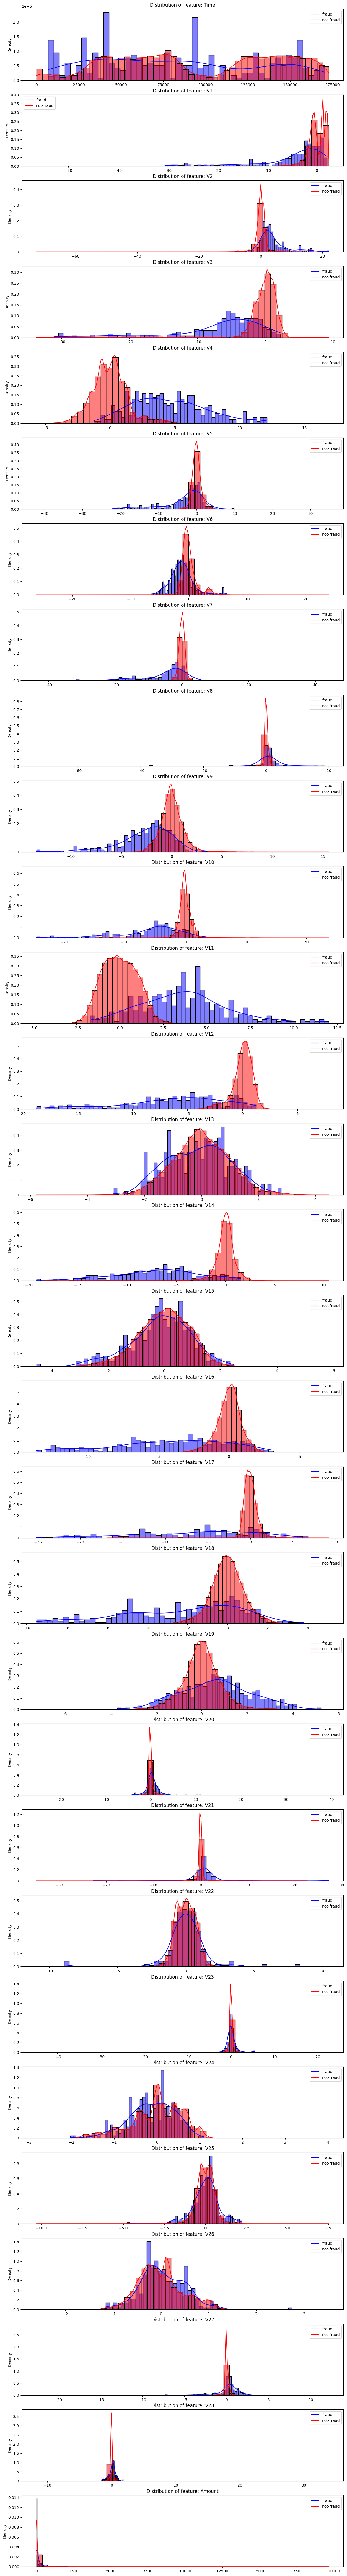

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Class' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Through these praphs, we can visually inspect how the data is distributed for each class. Transactions falling in the tails or outliers of the non-fraudulent distribution are likely to be flagged as potential anomalies, which can help us to identify the anomalies.




## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [ ]:
### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

df_v_feature = df.drop(['Class','Amount','Time'],axis = 1)
v_features = df_v_feature.columns
X_train_v = X_train.drop(['Amount','Time'], axis = 1)
X_val_v = X_val.drop(['Amount','Time'], axis = 1)


gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs_train = []
aucs_val = []
for i in range(28):
    X_train_v_feature = X_train_v.iloc[:, i].values.reshape(-1,1)
    X_val_v_feature = X_val_v.iloc[:, i].values.reshape(-1,1)
    gm.fit(X_train_v_feature)
    train_score = gm.score_samples(X_train_v_feature)
    val_score = gm.score_samples(X_val_v_feature)
    fp_train, tp_train, _ = roc_curve(y_train, 1-train_score)
    fp_val, tp_val, _ = roc_curve(y_val, 1-val_score)
    auc_train = auc(fp_train, tp_train)
    auc_val = auc(fp_val, tp_val)
    aucs_train.append(auc_train)
    aucs_val.append(auc_val)

In [ ]:
data = {'features': v_features, 'Train_AUC': aucs_train, 'Val_AUC':aucs_val }
table = pd.DataFrame(data=data)
table


,features,Train_AUC,Val_AUC
0,V1,0.704715,0.731833
1,V2,0.848104,0.837961
2,V3,0.880042,0.832369
3,V4,0.894416,0.871487
4,V5,0.760907,0.816581
5,V6,0.734653,0.721507
6,V7,0.862982,0.872639
7,V8,0.772515,0.828098
8,V9,0.799795,0.820999
9,V10,0.911624,0.914375


In [ ]:
# a.(4)

best_3_features = table.sort_values(['Val_AUC'], ascending=[False]).index[:3]

print("The best 3 features are: ", v_features[best_3_features[0]],",",v_features[best_3_features[1]], ",",v_features[best_3_features[2]])

The best 3 features are:  V14 , V12 , V17


In [ ]:
# a.(5)
# for column V14
from sklearn.metrics import f1_score

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v14 = X_train[v_features[13]].values.reshape(-1,1)
X_val_v14 = X_val[v_features[13]].values.reshape(-1,1)

gmm.fit(X_train_v14)

val_score = gmm.score_samples(X_val_v14)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V14','Best Threshold =',best_threshold,'Maximum F1 Score=',max_f1)

Feature: V14 Best Threshold = -23.083734930990502 Maximum F1 Score= 0.6218487394957983


In [ ]:
# for column V12

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v12 = X_train[v_features[11]].values.reshape(-1,1)
X_val_v12 = X_val[v_features[11]].values.reshape(-1,1)

gmm.fit(X_train_v12)

val_score = gmm.score_samples(X_val_v12)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V12','Best Threshold =',best_threshold,'Maximum F1 Score=',max_f1)

Feature: V12 Best Threshold = -12.154129810134235 Maximum F1 Score= 0.6285714285714286


In [ ]:
# for column V17

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v17 = X_train[v_features[16]].values.reshape(-1,1)
X_val_v17 = X_val[v_features[16]].values.reshape(-1,1)

gmm.fit(X_train_v17)

val_score = gmm.score_samples(X_val_v17)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V17','Best Threshold =',best_threshold,'Maximum F1 Score=',max_f1)

Feature: V17 Best Threshold = -21.823881253905707 Maximum F1 Score= 0.5614035087719298


# Part 2 a.(6)

 The complexity of my method  for determining the optimal threshold is O(1),since I used one for loop with 1000 points.

# Part 2 b.(1)

 The 3 features that had the best AUC in Part 2a are 'V14', 'V12', 'V17'.

In [ ]:
print('the best 3 AUC are ',aucs_val[13],',',aucs_val[11],',',aucs_val[16])

the best 3 AUC are  0.9552970953177244 , 0.9280062095946573 , 0.9257025422574674


# part 2 b.(2)

In [ ]:
#Part b.(2)
# AUC when fit a Gaussian only on not-fraud transactions

X_train_0 = X_train_v[y_train==0]     #only on not-fraud transactions, (class = 0)

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs_val_partb = []
for i in (13,11,16):
    X_train_v_feature = X_train_0.iloc[:, i].values.reshape(-1,1)
    X_val_v_feature = X_val_v.iloc[:, i].values.reshape(-1,1)
    gm.fit(X_train_v_feature)
    train_score = gm.score_samples(X_train_v_feature)
    val_score = gm.score_samples(X_val_v_feature)
    fp_val, tp_val, _ = roc_curve(y_val, 1-val_score)
    auc_val_partb = auc(fp_val, tp_val)
    aucs_val_partb.append(auc_val_partb)

data = {'features':['V14','V12','V17'], 'Auc_Validation_partb': aucs_val_partb}
table = pd.DataFrame(data=data)
table

,features,Auc_Validation_partb
0,V14,0.956061
1,V12,0.928370
2,V17,0.926476


In [ ]:
# F1 Score when fit a Gaussian only on not-fraud transactions
# for column V14

X_train_0 = X_train[y_train==0]     #only on not-fraud transactions, (class = 0)

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v14_0 = X_train_0[v_features[13]].values.reshape(-1,1)
X_val_v14 = X_val[v_features[13]].values.reshape(-1,1)

gmm.fit(X_train_v14_0)

val_score = gmm.score_samples(X_val_v14)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V14','Best Threshold for part b =',best_threshold,'Maximum F1 Score for part b=',max_f1)

Feature: V14 Best Threshold for part b = -26.08433774089859 Maximum F1 Score for part b= 0.6218487394957983


In [ ]:
# for column V12

X_train_0 = X_train[y_train==0]     #only on not-fraud transactions, (class = 0)

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v12_0 = X_train_0[v_features[11]].values.reshape(-1,1)
X_val_v12 = X_val[v_features[11]].values.reshape(-1,1)

gmm.fit(X_train_v12_0)

val_score = gmm.score_samples(X_val_v12)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V12','Best Threshold for part b =',best_threshold,'Maximum F1 Score for part b=',max_f1)

Feature: V12 Best Threshold for part b = -13.476823058739006 Maximum F1 Score for part b= 0.6285714285714286


In [ ]:
# for column V17

X_train_0 = X_train[y_train==0]     #only on not-fraud transactions, (class = 0)

gmm = GaussianMixture(n_components=1, random_state=0)
X_train_v17_0 = X_train_0[v_features[16]].values.reshape(-1,1)
X_val_v17 = X_val[v_features[16]].values.reshape(-1,1)

gmm.fit(X_train_v17_0)

val_score = gmm.score_samples(X_val_v17)

sorted_val_score = sorted(val_score)

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 1000):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
print('Feature: V17','Best Threshold for part b =',best_threshold,'Maximum F1 Score for part b=',max_f1)

Feature: V17 Best Threshold for part b = -27.768574198319403 Maximum F1 Score for part b= 0.5614035087719298


# part 2 b.(3)

In [ ]:
#part 2 b.(3)
# compare table
data = {'features':['V14','V12','V17'],'Auc_Validation_part_a':['0.9552970953177244','0.9280062095946573','0.9257025422574674'], 'Auc_Validation_part_b': aucs_val_partb,\
     'f1_score_for_part_a':['0.6218487394957983','0.6285714285714286','0.5614035087719298'],'f1_score_for_part_b':['0.6218487394957983','0.6285714285714286','0.5614035087719298']}
table = pd.DataFrame(data=data)
table


,features,Auc_Validation_part_a,Auc_Validation_part_b,f1_score_for_part_a,f1_score_for_part_b
0,V14,0.9552970953177244,0.956061,0.6218487394957983,0.6218487394957983
1,V12,0.9280062095946573,0.928370,0.6285714285714286,0.6285714285714286
2,V17,0.9257025422574674,0.926476,0.5614035087719298,0.5614035087719298


# part 2 b.(4)

The results between part a and part b are very similar, and the F1 scores are excally the same.

I think the reason is that the dataset is unbalanced, most of the transactions are not-fraud transactions, so there is no too much difference on not-fraud transactions and all transactions



## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





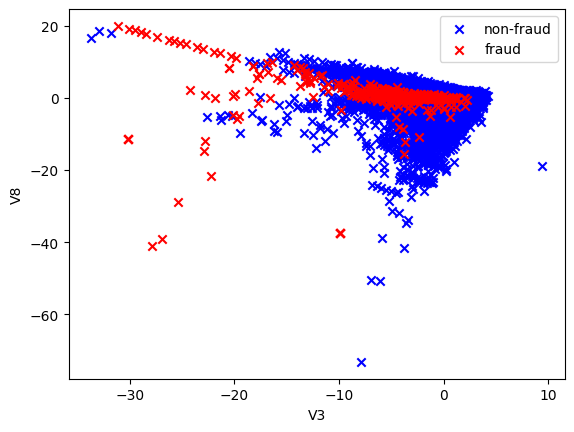

In [ ]:
### YOUR CODE HERE ###
# 1. pick feactures V3 and V8

plt.scatter(X_train['V3'][y_train==0],X_train['V8'][y_train==0],color='blue',label = 'non-fraud',marker="x")  #Non Fraudulent
plt.scatter(X_train['V3'][y_train==1],X_train['V8'][y_train==1],color='red',label = 'fraud',marker="x")  #Fraudulent
plt.xlabel('V3')
plt.ylabel('V8')
plt.legend()


# part 3 (4)

Based on the plot, I decide n = 1, because there is 1 cluster of valid **transactions**

In [ ]:
#part 3 (5)
#Fit  Gaussian model
X_train_V38 = X_train[['V3','V8']]
X_val_V38 = X_val[['V3','V8']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V38)

#part 3 (6)
#Compute AUC on both training and validation sets

score_train = gmm.score_samples(X_train_V38)
score_validation = gmm.score_samples(X_val_V38)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.8843430465562495
AUC for validation set is: 0.8480933999242405


# part 3 (7)

Pick 3 new pairs of features and repeat steps 2 to 6


AUC for training set is: 0.8109665646801025
AUC for validation set is: 0.8099863290683302


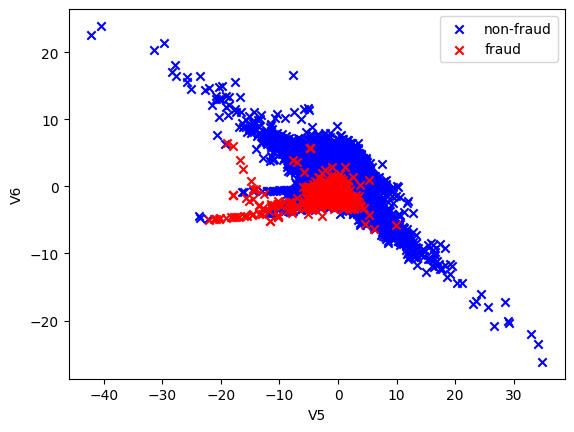

In [ ]:
# First pair: pick V5 AND V6

# Scatter plot
plt.scatter(X_train['V5'][y_train==0],X_train['V6'][y_train==0],color='blue',label = 'non-fraud',marker="x")  #Non Fraudulent
plt.scatter(X_train['V5'][y_train==1],X_train['V6'][y_train==1],color='red',label = 'fraud',marker="x")  #Fraudulent
plt.xlabel('V5')
plt.ylabel('V6')
plt.legend()

# Choose n = 1, Fit the Gaussian model
X_train_V56 = X_train[['V5','V6']]
X_val_V56 = X_val[['V5','V6']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V56)

#Compute AUC on both training and validation sets

score_train_V56 = gmm.score_samples(X_train_V56)
score_validation_V56 = gmm.score_samples(X_val_V56)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train_V56)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation_V56)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.9472020905841969
AUC for validation set is: 0.9281148626171833


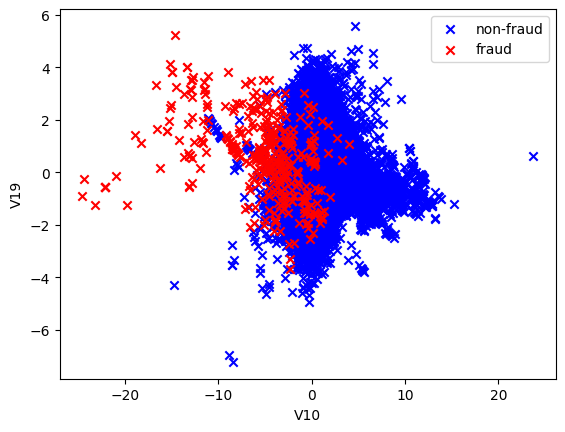

In [ ]:
# Second pair: pick V10 AND V19

# Scatter plot
plt.scatter(X_train['V10'][y_train==0],X_train['V19'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V10'][y_train==1],X_train['V19'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V10')
plt.ylabel('V19')
plt.legend()

# Choose n = 1, Fit the Gaussian model
X_train_V1019 = X_train[['V10','V19']]
X_val_V1019 = X_val[['V10','V19']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V1019)

#Compute AUC on both training and validation sets

score_train_V1019 = gmm.score_samples(X_train_V1019)
score_validation_V1019 = gmm.score_samples(X_val_V1019)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train_V1019)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation_V1019)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

AUC for training set is: 0.5680560416299383
AUC for validation set is: 0.5852747619122038


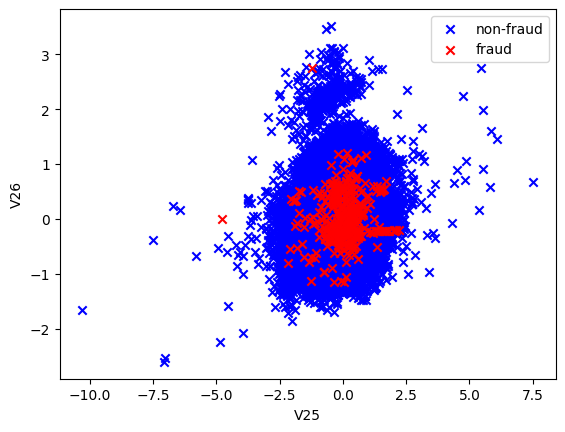

In [ ]:
# Third pair: pick V25 AND V26

# Scatter plot
plt.scatter(X_train['V25'][y_train==0],X_train['V26'][y_train==0],color='blue',label = 'non-fraud',marker="x")  #Non Fraudulent
plt.scatter(X_train['V25'][y_train==1],X_train['V26'][y_train==1],color='red',label = 'fraud',marker="x")  #Fraudulent
plt.xlabel('V25')
plt.ylabel('V26')
plt.legend()

# Choose n = 1, Fit the Gaussian model
X_train_V2526 = X_train[['V25','V26']]
X_val_V2526 = X_val[['V25','V26']]

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_V2526)

#Compute AUC on both training and validation sets

score_train_V2526 = gmm.score_samples(X_train_V2526)
score_validation_V2526 = gmm.score_samples(X_val_V2526)

fp_train, tp_train, _ = roc_curve(y_train, 1-score_train_V2526)
auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-score_validation_V2526)
auc_val = auc(fp_val, tp_val)



print('AUC for training set is:', auc_train)
print('AUC for validation set is:', auc_val)

# part 3 (8)

For each pair, find a threshold to maximize your validation set F1 Score

In [ ]:
# V5 and V6
sorted_val_score_56 = sorted(score_validation_V56)  #sort points by probability first

max_f1_56 = 0
best_threshold_56 = 0
tr_56=0

for i in range(0, 1000):
    tr_56 = sorted_val_score_56[i]
    f1_56 = f1_score(y_val, score_validation_V56 < tr_56)
    if (f1_56>max_f1_56):
        max_f1_56=f1_56
        best_threshold_56=tr_56

# V10 and V19
sorted_val_score_1019 = sorted(score_validation_V1019)  #sort points by probability first

max_f1_1019 = 0
best_threshold_1019 = 0
tr_1019=0

for i in range(0, 1000):
    tr_1019 = sorted_val_score_1019[i]
    f1_1019 = f1_score(y_val, score_validation_V1019 < tr_1019)
    if (f1_1019>max_f1_1019):
        max_f1_1019=f1_1019
        best_threshold_1019=tr_1019


# V25 and V26
sorted_val_score_2526 = sorted(score_validation_V2526)  #sort points by probability first

max_f1_2526 = 0
best_threshold_2526 = 0
tr_2526=0

for i in range(0, 1000):
    tr_2526 = sorted_val_score_2526[i]
    f1_2526 = f1_score(y_val, score_validation_V2526 < tr_2526)
    if (f1_2526>max_f1_2526):
        max_f1_2526=f1_2526
        best_threshold_2526=tr_2526

print("Optimal Threshold of V5 AND V6 =",best_threshold_56,"with F1 score =",max_f1_56)
print("Optimal Threshold of V10 AND V19 =",best_threshold_1019,"with F1 score =",max_f1_1019)
print("Optimal Threshold of V25 AND V26 =",best_threshold_2526,"with F1 score =",max_f1_2526 )

Optimal Threshold of V5 AND V6 = -32.82380219517342 with F1 score = 0.16107382550335567
Optimal Threshold of V10 AND V19 = -23.174707595681255 with F1 score = 0.25136612021857924
Optimal Threshold of V25 AND V26 = -23.90390561725634 with F1 score = 0.0273972602739726


# part 3 (9)

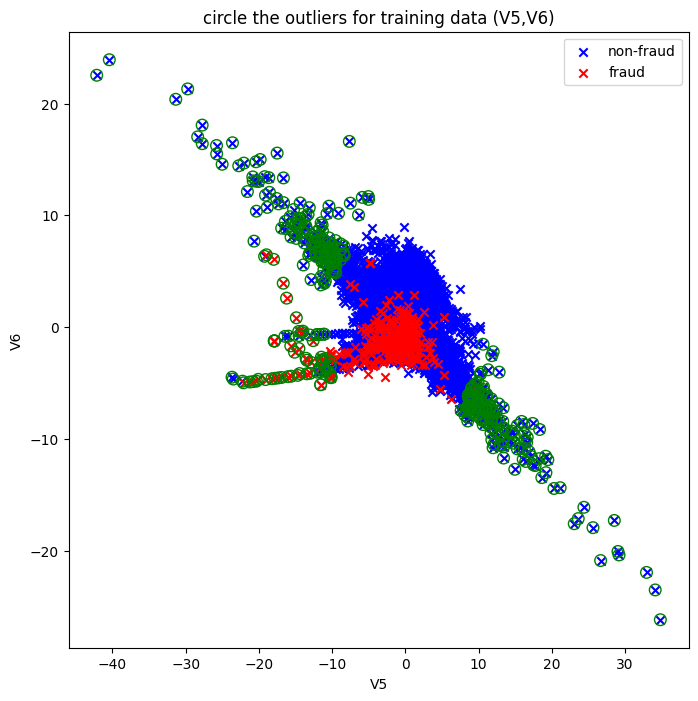

In [ ]:
# First pair: pick V5 AND V6

# circle the outliers for training data
X_train_V56_array = np.array(X_train[['V5','V6']]).reshape(-1,2)
X_val_V56_array = np.array(X_val[['V5','V6']]).reshape(-1,2)

plt.figure(figsize=(8,8))
plt.scatter(X_train['V5'][y_train==0],X_train['V6'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V5'][y_train==1],X_train['V6'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V5')
plt.ylabel('V6')
plt.legend()


X_train_V56_array = np.array(X_train[['V5','V6']]).reshape(-1,2)
X_val_V56_array = np.array(X_val[['V5','V6']]).reshape(-1,2)

outliers = np.nonzero(score_train_V56<best_threshold_56)[0]
plt.scatter(X_train_V56_array[outliers,0],X_train_V56_array[outliers,1],marker="o",facecolor= "none",edgecolor="green",s=70)
plt.title('circle the outliers for training data (V5,V6)')
plt.show()

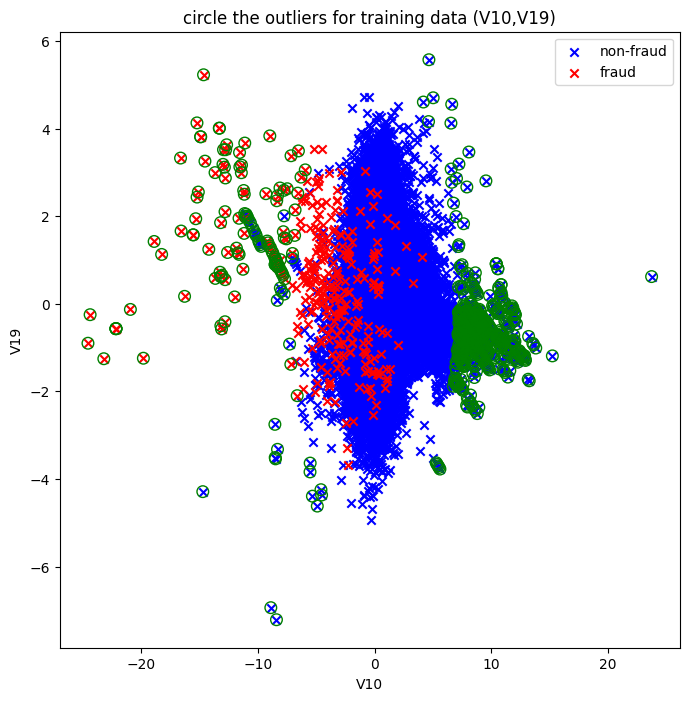

In [ ]:
# Second pair: pick V10 AND V19

# circle the outliers for training data
X_train_V1019_array = np.array(X_train[['V10','V19']]).reshape(-1,2)
X_val_V1019_array = np.array(X_val[['V10','V19']]).reshape(-1,2)

plt.figure(figsize=(8,8))
plt.scatter(X_train['V10'][y_train==0],X_train['V19'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V10'][y_train==1],X_train['V19'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V10')
plt.ylabel('V19')
plt.legend()


X_train_V1019_array = np.array(X_train[['V10','V19']]).reshape(-1,2)
X_val_V1019_array = np.array(X_val[['V10','V19']]).reshape(-1,2)

outliers = np.nonzero(score_train_V1019<best_threshold_1019)[0]
plt.scatter(X_train_V1019_array[outliers,0],X_train_V1019_array[outliers,1],marker="o",facecolor= "none",edgecolor="green",s=70)
plt.title('circle the outliers for training data (V10,V19)')
plt.show()

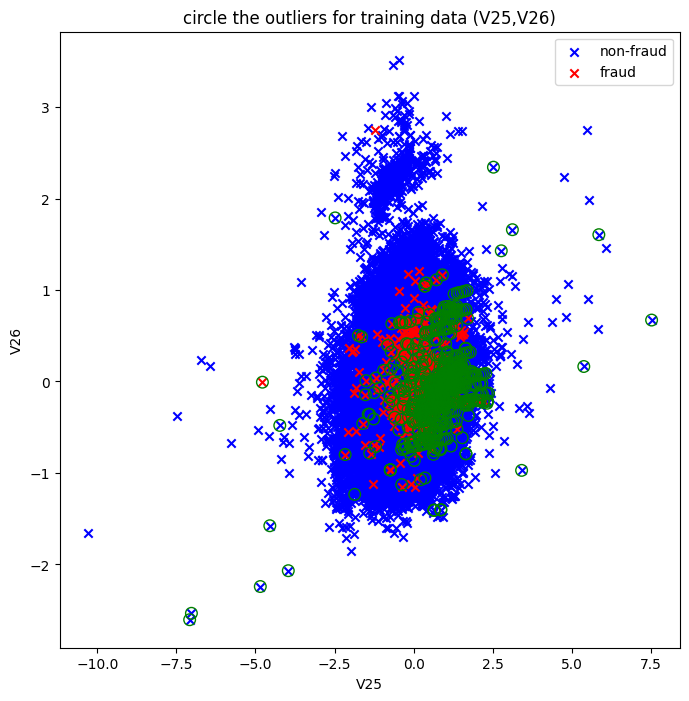

In [ ]:
# Third pair: pick V25 AND V26

# circle the outliers for training data
X_train_V2526_array = np.array(X_train[['V25','V26']]).reshape(-1,2)
X_val_V2526_array = np.array(X_val[['V25','V26']]).reshape(-1,2)

plt.figure(figsize=(8,8))
plt.scatter(X_train['V25'][y_train==0],X_train['V26'][y_train==0],color='blue',label = 'non-fraud',marker="x")
plt.scatter(X_train['V25'][y_train==1],X_train['V26'][y_train==1],color='red',label = 'fraud',marker="x")
plt.xlabel('V25')
plt.ylabel('V26')
plt.legend()


X_train_V2526_array = np.array(X_train[['V25','V26']]).reshape(-1,2)
X_val_V2526_array = np.array(X_val[['V25','V26']]).reshape(-1,2)

outliers = np.nonzero(score_train_V1019<best_threshold_1019)[0]
plt.scatter(X_train_V2526_array[outliers,0],X_train_V2526_array[outliers,1],marker="o",facecolor= "none",edgecolor="green",s=70)
plt.title('circle the outliers for training data (V25,V26)')
plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:
### YOUR CODE HERE ###
# 1
# pick feature V7  Fit a Gaussian distribution ( G1 )
X_train_0 = X_train['V7'][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,1)
X_val_array = np.array(X_val[['V7']]).reshape(-1,1)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)

# 2 Fit another Gaussian distribution ( G2 )
X_train_1 = X_train['V7'][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,1)

gmm_1 = GaussianMixture(n_components=1, random_state=0)
gmm_1.fit(X_train_array_1)

# 3 Compute the score samples ( S ) for both  G1  and  G2
S1 = gmm_0.score_samples(X_val_array)
S2 = gmm_1.score_samples(X_val_array)



In [ ]:
# 4 Find an optimal c and the maximum  F1 Score
c=0
max_c=0
max_f1=0


while(c<=10):
  f1 = f1_score(y_val, S1 < c*S2)
  if(f1 > max_f1):
    max_f1 = f1
    max_c = c
  c = c+0.1

print("Optimal c of V7 =",max_c,"with F1 score =",max_f1)


Optimal c of V7 = 9.99999999999998 with F1 score = 0.2769230769230769


In [ ]:
# 5 Repeat the steps above for all the features

# for validation set:

optimal_c = []
best_f1 = []

for v_feature in v_features:
  X_train_0 = X_train[v_feature][y_train==0]
  X_train_array_0 = np.array(X_train_0).reshape(-1,1)
  X_val_array = np.array(X_val[[v_feature]]).reshape(-1,1)

  gmm_0 = GaussianMixture(n_components=1, random_state=0)
  gmm_0.fit(X_train_array_0)


  X_train_1 = X_train[v_feature][y_train==1]
  X_train_array_1 = np.array(X_train_1).reshape(-1,1)

  gmm_1 = GaussianMixture(n_components=1, random_state=0)
  gmm_1.fit(X_train_array_1)

  S1 = gmm_0.score_samples(X_val_array)
  S2 = gmm_1.score_samples(X_val_array)

  c=0
  max_c=0
  max_f1=0

  while(c<=10):
    f1 = f1_score(y_val, S1 < c*S2)
    if(f1 > max_f1):
      max_f1 = f1
      max_c = c
    c = c+0.1

  optimal_c.append(max_c)
  best_f1.append(max_f1)

data={'Feature': v_features, 'Optimal C': optimal_c, 'Best F1 score': best_f1}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C,Best F1 score
0,V1,8.1,0.141593
1,V2,5.9,0.177215
2,V3,8.2,0.304762
3,V4,5.0,0.366972
4,V5,8.5,0.209524
5,V6,2.2,0.123596
6,V7,10.0,0.276923
7,V8,9.2,0.100000
8,V9,3.3,0.484211
9,V10,8.0,0.469388


In [ ]:
# for training set:

optimal_c = []
best_f1 = []

for v_feature in v_features:
  X_train_0 = X_train[v_feature][y_train==0]
  X_train_array_0 = np.array(X_train_0).reshape(-1,1)
  X_train_array = np.array(X_train[[v_feature]]).reshape(-1,1)

  gmm_0 = GaussianMixture(n_components=1, random_state=0)
  gmm_0.fit(X_train_array_0)


  X_train_1 = X_train[v_feature][y_train==1]
  X_train_array_1 = np.array(X_train_1).reshape(-1,1)

  gmm_1 = GaussianMixture(n_components=1, random_state=0)
  gmm_1.fit(X_train_array_1)

  S1 = gmm_0.score_samples(X_train_array)
  S2 = gmm_1.score_samples(X_train_array)

  c=0
  max_c=0
  max_f1=0

  while(c<=10):
    f1 = f1_score(y_train, S1 < c*S2)
    if(f1 > max_f1):
      max_f1 = f1
      max_c = c
    c = c+0.1

  optimal_c.append(max_c)
  best_f1.append(max_f1)

data={'Feature': v_features, 'Optimal C': optimal_c, 'Best F1 score': best_f1}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C,Best F1 score
0,V1,6.7,0.144681
1,V2,6.1,0.166259
2,V3,5.1,0.292011
3,V4,4.2,0.371658
4,V5,8.2,0.179661
5,V6,1.8,0.110236
6,V7,10.0,0.245023
7,V8,10.0,0.089172
8,V9,3.1,0.418426
9,V10,8.0,0.414873


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones! Why does it make sense to have multiple components for fraud transactions?

# Model 1

 two-gaussian model, multiple features V12,V14,V17, a single component for the valid transaction, and 1 component for fraud.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=1, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,7.1,0.784733,6.7,0.8,0.958537,0.952565


# Model 2
two-gaussian model, multiple features V12,V14,V17, a single component for the valid transaction, and 4 components for fraud.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,6.8,0.789238,7.4,0.803279,0.958537,0.952565


# Model 3
two-gaussian model, multiple features V12,V14,V17, a single component for the valid transaction, and 6 components for fraud.




In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=6, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,6.7,0.791789,6.2,0.769231,0.958537,0.952565


# Model 4
two-gaussian model, multiple features V12,V14,V17,V8,V19 a single component for the valid transaction, and 4 components for fraud.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17','V8','V19']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,5)
X_train_array = np.array(X_train[['V12','V14','V17','V8','V19']]).reshape(-1,5)
X_val_array = np.array(X_val[['V12','V14','V17','V8','V19']]).reshape(-1,5)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17','V8','V19']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,5)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17 V8 V19', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17 V8 V19,7.4,0.681416,6.2,0.661871,0.967025,0.952807


# Model 5
two-gaussian model, multiple features V12,V14,V17,V3,V8,V10,V15 a single component for the valid transaction, and 4 components for fraud.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17','V3','V8','V10','V15']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,7)
X_train_array = np.array(X_train[['V12','V14','V17','V3','V8','V10','V15']]).reshape(-1,7)
X_val_array = np.array(X_val[['V12','V14','V17','V3','V8','V10','V15']]).reshape(-1,7)

gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17','V3','V8','V10','V15']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,7)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17 V3 V8 V10 V15', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17 V3 V8 V10 V15,6.9,0.738061,5.8,0.690647,0.964442,0.945002


# Model 6
two-gaussian model, multiple features V12,V14,V17, 2 components for the valid transaction, and 4 components for fraud.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []


X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm_0 = GaussianMixture(n_components=2, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_train = gmm_0.score_samples(X_train_array)
S2_train = gmm_1.score_samples(X_train_array)
S1_val = gmm_0.score_samples(X_val_array)
S2_val = gmm_1.score_samples(X_val_array)

fp_train_s1, tp_train_s1, _ = roc_curve(y_train, 1-S1_train)
fp_train_s2, tp_train_s2, _ = roc_curve(y_train, 1-S2_train)
auc_train = auc(fp_train_s1, tp_train_s1)

fp_val_s1, tp_val_s1, _ = roc_curve(y_val, 1-S1_val)
fp_val_s2, tp_val_s2, _ = roc_curve(y_val, 1-S2_val)
auc_val = auc(fp_val_s1, tp_val_s1)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0

while(c_train<=10):
  f1_train = f1_score(y_train, S1_train < c_train*S2_train)
  if(f1_train > max_f1_train):
    max_f1_train = f1_train
    max_c_train = c_train
  c_train = c_train+0.1

while(c_val<=10):
  f1_val = f1_score(y_val, S1_val < c_val*S2_val)
  if(f1_val > max_f1_val):
    max_f1_val = f1_val
    max_c_val = c_val
  c_val = c_val+0.1

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,3.4,0.784431,3.0,0.787879,0.959236,0.951853


# Model 7
single-gaussian model, multiple features V12,V14,V17, a single component.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,-37.874206,0.708752,-32.935749,0.690141,0.958748,0.95351


# Model 8
single-gaussian model, multiple features V12,V14,V17, 4 components.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train[['V12','V14','V17']]).reshape(-1,3)
X_val_array = np.array(X_val[['V12','V14','V17']]).reshape(-1,3)

gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,-13.211818,0.53125,-14.056821,0.490196,0.960321,0.952944


# Model 9
single-gaussian model, single feature V12, 4 components.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train['V12']).reshape(-1,1)
X_val_array = np.array(X_val['V12']).reshape(-1,1)

gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12 V14 V17', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12 V14 V17,-7.732001,0.548552,-8.794563,0.525253,0.924229,0.934108


# Model 10
single-gaussian model, single feature V12, single component.

In [ ]:
optimal_c_train = []
best_f1_train = []
optimal_c_val = []
best_f1_val = []



X_train_array = np.array(X_train['V12']).reshape(-1,1)
X_val_array = np.array(X_val['V12']).reshape(-1,1)

gmm = GaussianMixture(n_components=1, random_state=0)
gmm.fit(X_train_array)



p_train = gmm.score_samples(X_train_array)
p_val = gmm.score_samples(X_val_array)


fp_train, tp_train, _ = roc_curve(y_train, 1-p_train)

auc_train = auc(fp_train, tp_train)

fp_val, tp_val, _ = roc_curve(y_val, 1-p_val)
auc_val = auc(fp_val, tp_val)

c_val=0
c_train=0
max_c_train=0
max_f1_train=0
max_c_val=0
max_f1_val=0
sorted_val_score = sorted(p_val)

for i in range(0, 300):
    c_val = sorted_val_score[i]
    f1_val = f1_score(y_val, p_val < c_val)
    if (f1_val>max_f1_val):
        max_f1_val=f1_val
        max_c_val=c_val
for i in range(0, 300):
    c_train = sorted_val_score[i]
    f1_train = f1_score(y_train, p_train < c_train)
    if (f1_train>max_f1_train):
        max_f1_train=0
        max_f1_train=f1_train
        max_c_train=c_train

optimal_c_train.append(max_c_train)
best_f1_train.append(max_f1_train)
optimal_c_val.append(max_c_val)
best_f1_val.append(max_f1_val)

data={'Feature': 'V12', 'Optimal C Training': optimal_c_train, 'Best F1 score Training': best_f1_train,\
   'Optimal C validation': optimal_c_val, 'Best F1 score validation': best_f1_val, 'Auc_training':auc_train, 'Auc_validation':auc_val}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Training,Best F1 score Training,Optimal C validation,Best F1 score validation,Auc_training,Auc_validation
0,V12,-10.900757,0.697749,-12.15413,0.628571,0.912838,0.928006


# What kind of model works better? How many features are best (and which ones)? How many Gaussians?

 The modles that with two-gaussian, multiple features, single component for the valid transaction, and multiple components for fraud works better

 The model with features V12,V14,V17 ,2 Gaussians,single component for the valid transaction, and 4 components for fraud is the best model

# Why does it make sense to have multiple components for the fraudulent transactions?
 The different type of fraud transactions may have the different number of clusters represent the fraud transactions, so we can use the multiple components.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


The model with features V12,V14,V17 ,2 Gaussians,single component for the valid transaction, and 4 components for fraud is the best model

In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

optimal_c_test = []
best_f1_test = []
precision_on_test = []
recall_on_test = []

X_train_0 = X_train[['V12','V14','V17']][y_train==0]
X_train_array_0 = np.array(X_train_0).reshape(-1,3)
X_test_array = np.array(X_test[['V12','V14','V17']]).reshape(-1,3)


gmm_0 = GaussianMixture(n_components=1, random_state=0)
gmm_0.fit(X_train_array_0)


X_train_1 = X_train[['V12','V14','V17']][y_train==1]
X_train_array_1 = np.array(X_train_1).reshape(-1,3)

gmm_1 = GaussianMixture(n_components=4, random_state=0)
gmm_1.fit(X_train_array_1)


S1_test = gmm_0.score_samples(X_test_array)
S2_test = gmm_1.score_samples(X_test_array)



c_test=0
max_c_test=0
max_f1_test=0


while(c_test<=10):
  f1_test = f1_score(y_test, S1_test < c_test*S2_test)
  if(f1_test > max_f1_test):
    max_f1_test = f1_test
    max_c_test = c_test
    precision_test = precision_score(y_test, S1_test < c_test*S2_test)
    recall_test = recall_score(y_test, S1_test < c_test*S2_test)
  c_test = c_test+0.1



optimal_c_test.append(max_c_test)
best_f1_test.append(max_f1_test)
precision_on_test.append(precision_test)
recall_on_test.append(recall_test)

data={'Feature': 'V12 V14 V17', 'Optimal C Test': optimal_c_test, 'Best F1 score Test': best_f1_test,\
   'Precision Test': precision_on_test, 'Recall Test': recall_on_test}
table = pd.DataFrame(data=data)
table

,Feature,Optimal C Test,Best F1 score Test,Precision Test,Recall Test
0,V12 V14 V17,5.1,0.792208,0.7625,0.824324


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.




# Log-Normal Distribution:

The log-normal distribution is often used to model data that is expected to be positive and skewed.
It's common in finance for modeling stock prices and in biology for modeling the size of biological populations.

# Poisson Distribution:

The Poisson distribution is suitable for modeling the number of events occurring in a fixed interval of time or space.
It is often used in applications like modeling the number of customer arrivals at a service center or the number of accidents at an intersection.

# Reference

https://www.investopedia.com/terms/l/log-normal-distribution.asp

https://en.wikipedia.org/wiki/Poisson_distribution

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html APS1070_Project_2.ipynb

[NbConvertApp] Converting notebook APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 2860443 bytes to APS1070_Project_2.html
